# Preprocessing for Credit Card Default

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data.datasets.credit_card_default import credit_card_default_loader
from data.adapters import continuous_adapter

In [4]:
loader = credit_card_default_loader.CreditCardDefaultLoader(only_continuous=False)
dataset = loader.load_data()
dataset

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,26,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,34,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,37,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,43,-1,-1,-1,-1,0,0,1683,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,37,4,3,2,-1,0,0,3565,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


1. For each PAY_N column and each pay category, compute the fraction of points where Y = 0.
2. Now for each category, compute the average across all PAY_N columns.
3. Graph the average

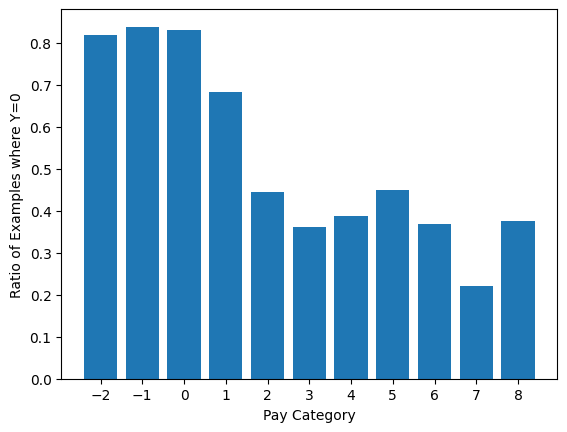

In [15]:
pay_data = [
    dataset.groupby(f'PAY_{i}').apply(lambda x: x[x.Y == 0].size / x.size) for i in range(1, 7)
]

category_ratios = dict([(i, []) for i in range(-2, 9)])
for ratios in pay_data:
    for cat in range(-2, 9):
        if cat in ratios:
            category_ratios[cat].append(ratios[cat])

avg_category_ratios = {}
for cat, ratios in category_ratios.items():
    avg_category_ratios[cat] = sum(ratios) / len(ratios)

categories = avg_category_ratios.keys()
ratios = avg_category_ratios.values()

plt.bar(x=range(-2, 9), height=ratios)
plt.xticks(range(-2, 9))
plt.xlabel("Pay Category")
plt.ylabel("Ratio of Examples where Y=0")
None

In [16]:
pay_columns = [f'PAY_{i}' for i in range(1, 7)]

pay_categories = pd.DataFrame({
    'NUM_0': (dataset[pay_columns] == 0).sum(axis=1),
    'NUM_1': (dataset[pay_columns] == -1).sum(axis=1),
    'NUM_2': (dataset[pay_columns] == -2).sum(axis=1),
    'NUM_LATE': (dataset[pay_columns] > 0).sum(axis=1),
    'Y': dataset.Y
})

pay_categories.corr()

,NUM_0,NUM_1,NUM_2,NUM_LATE,Y
NUM_0,1.000000,-0.546083,-0.512187,-0.348985,-0.153156
NUM_1,-0.546083,1.000000,-0.134049,-0.202999,-0.084944
NUM_2,-0.512187,-0.134049,1.000000,-0.158982,-0.039161
NUM_LATE,-0.348985,-0.202999,-0.158982,1.000000,0.398394
Y,-0.153156,-0.084944,-0.039161,0.398394,1.000000
